## Credit Card Lead Prediction

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.

The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 

In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:
- Customer details (gender, age, region etc.)
- Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

- Channel_Code: A customer acquisition channel is any place your customers meet your brand for the first time — whether through social media, organic search, or a paid ad. Customer acquisition channels are how you bring in new customers.

- Vintage: Vintage is a colloquial term used to describe mortgage-backed securities (MBS) that have been "seasoned." That is, they've been issued long enough, and enough on-time payments have been made, that the risk of default is lower. Vintage is the age of an item as it relates to the year it was created.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import  export_graphviz
import pydotplus, graphviz

from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 15)

C:\Users\avina\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_train = pd.read_csv(r"C:\Users\avina\OneDrive\Desktop\Data\Job-a-thon dataset\train_s3TEQDk.csv")
df_train.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0


In [3]:
df_train.shape

(245725, 11)

In [4]:
df_test = pd.read_csv(r"C:\Users\avina\OneDrive\Desktop\Data\Job-a-thon dataset\test_mSzZ8RL.csv")
df_test.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No
5,MZZAQMPT,Male,60,RG268,Self_Employed,X3,110,No,4624262,No
6,Y88TW36I,Female,69,RG253,Other,X2,67,No,1032764,No
7,3UGOAQNU,Female,30,RG257,Salaried,X1,33,No,837009,No
8,VVUKMUJT,Male,43,RG284,Salaried,X3,81,NaN,1001232,Yes
9,9R363ZXS,Female,54,RG283,Self_Employed,X2,37,Yes,1667851,No


In [5]:
df_test.shape

(105312, 10)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [7]:
df_train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


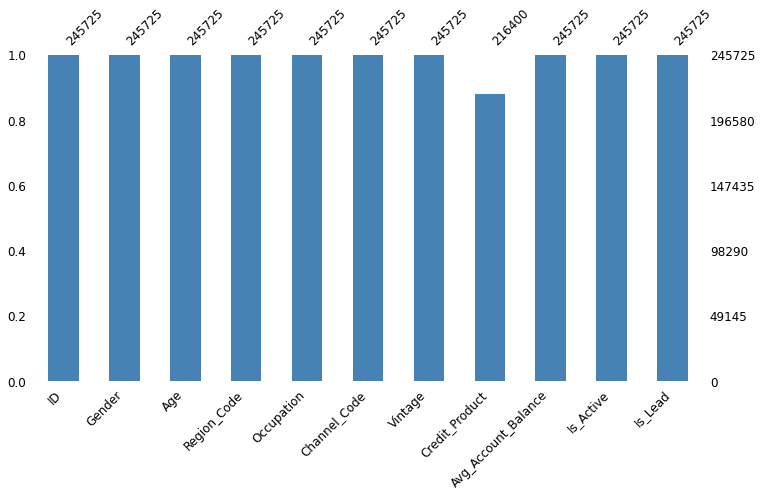

In [9]:
import missingno as msno
msno.bar(df_train, figsize=(12, 6), fontsize=12, color='steelblue')

In [10]:
# df_train["Credit_Product"].apply(lambda x: x.fillna(x.mode, inplace=True))

In [11]:
df_train['Credit_Product'].fillna(df_train['Credit_Product'].mode()[0],inplace=True)
df_train['Credit_Product'].head(20)

0      No
1      No
2      No
3      No
4      No
5      No
6      No
7      No
8      No
9     Yes
10     No
11    Yes
12     No
13    Yes
14     No
15     No
16    Yes
17    Yes
18     No
19     No
Name: Credit_Product, dtype: object

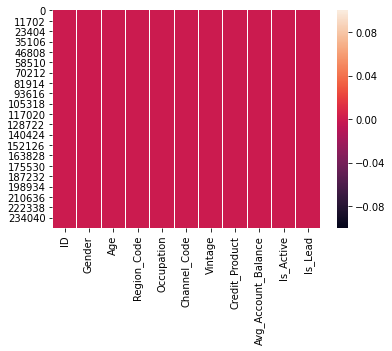

In [12]:
sns.heatmap(df_train.isnull())

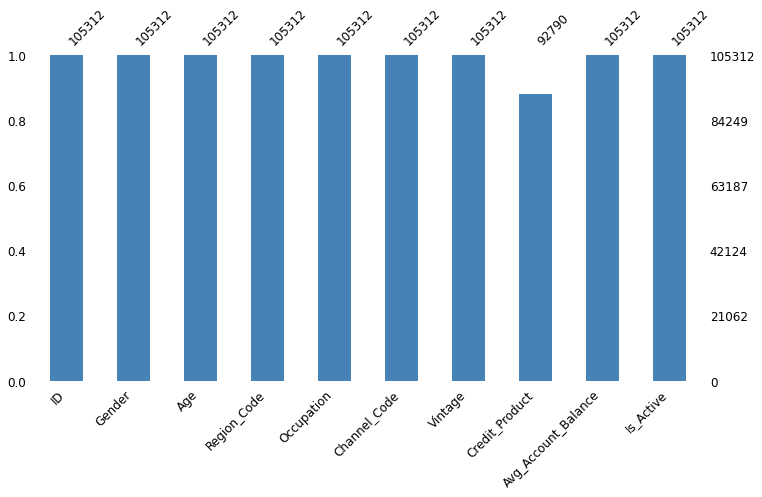

In [13]:
import missingno as msno
msno.bar(df_test, figsize=(12, 6), fontsize=12, color='steelblue')

In [14]:
df_test['Credit_Product'].fillna(df_test['Credit_Product'].mode()[0],inplace=True)
df_test['Credit_Product'].head(20)

0     Yes
1      No
2      No
3      No
4      No
5      No
6      No
7      No
8      No
9     Yes
10     No
11    Yes
12     No
13    Yes
14     No
15     No
16    Yes
17     No
18     No
19     No
Name: Credit_Product, dtype: object

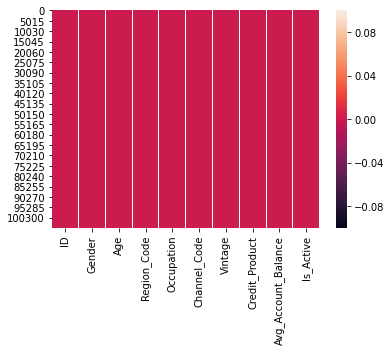

In [15]:
sns.heatmap(df_test.isnull())

In [16]:
for features in df_train.columns:
    print(f"{features}:{df_train[features].nunique()}")

ID:245725
Gender:2
Age:63
Region_Code:35
Occupation:4
Channel_Code:4
Vintage:66
Credit_Product:2
Avg_Account_Balance:135292
Is_Active:2
Is_Lead:2


In [17]:
for features in df_test.columns:
    print(f"{features}:{df_test[features].nunique()}")

ID:105312
Gender:2
Age:62
Region_Code:35
Occupation:4
Channel_Code:4
Vintage:66
Credit_Product:2
Avg_Account_Balance:78315
Is_Active:2


In [18]:
for features in ['Credit_Product','Is_Active']:
    df_train[features] = df_train[features].apply(lambda x: 1 if x =='Yes' else (0 if x =='No' else None))

In [19]:
#df_train['Credit_Product'] = df_train['Credit_Product'].astype(int)

In [20]:
df_train['Gender'] = df_train['Gender'].apply(lambda x: 1 if x =='Male' else (0 if x =='Female' else None))

In [21]:
#df_train['Credit_Product'].ast

df_train.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,0,73,RG268,Other,X3,43,0,1045696,0,0
1,IDD62UNG,0,30,RG277,Salaried,X1,32,0,581988,0,0
2,HD3DSEMC,0,56,RG268,Self_Employed,X3,26,0,1484315,1,0
3,BF3NC7KV,1,34,RG270,Salaried,X1,19,0,470454,0,0
4,TEASRWXV,0,30,RG282,Salaried,X1,33,0,886787,0,0
5,ACUTYTWS,1,56,RG261,Self_Employed,X1,32,0,544163,1,0
6,ETQCZFEJ,1,62,RG282,Other,X3,20,0,1056750,1,1
7,JJNJUQMQ,0,48,RG265,Self_Employed,X3,13,0,444724,1,0
8,ZMQFYKCB,0,40,RG283,Self_Employed,X2,38,0,1274284,0,0
9,NVKTFBA2,0,55,RG268,Self_Employed,X2,49,1,2014239,0,0


In [22]:
for features in ['Credit_Product','Is_Active']:
    df_test[features] = df_test[features].apply(lambda x: 1 if x =='Yes' else (0 if x =='No' else None))

In [23]:
df_test['Gender'] = df_test['Gender'].apply(lambda x: 1 if x =='Male' else (0 if x =='Female' else None))

In [24]:
df_test.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,1,29,RG254,Other,X1,25,1,742366,0
1,CCMEWNKY,1,43,RG268,Other,X2,49,0,925537,0
2,VK3KGA9M,1,31,RG270,Salaried,X1,14,0,215949,0
3,TT8RPZVC,1,29,RG272,Other,X1,33,0,868070,0
4,SHQZEYTZ,0,29,RG270,Other,X1,19,0,657087,0
5,MZZAQMPT,1,60,RG268,Self_Employed,X3,110,0,4624262,0
6,Y88TW36I,0,69,RG253,Other,X2,67,0,1032764,0
7,3UGOAQNU,0,30,RG257,Salaried,X1,33,0,837009,0
8,VVUKMUJT,1,43,RG284,Salaried,X3,81,0,1001232,1
9,9R363ZXS,0,54,RG283,Self_Employed,X2,37,1,1667851,0


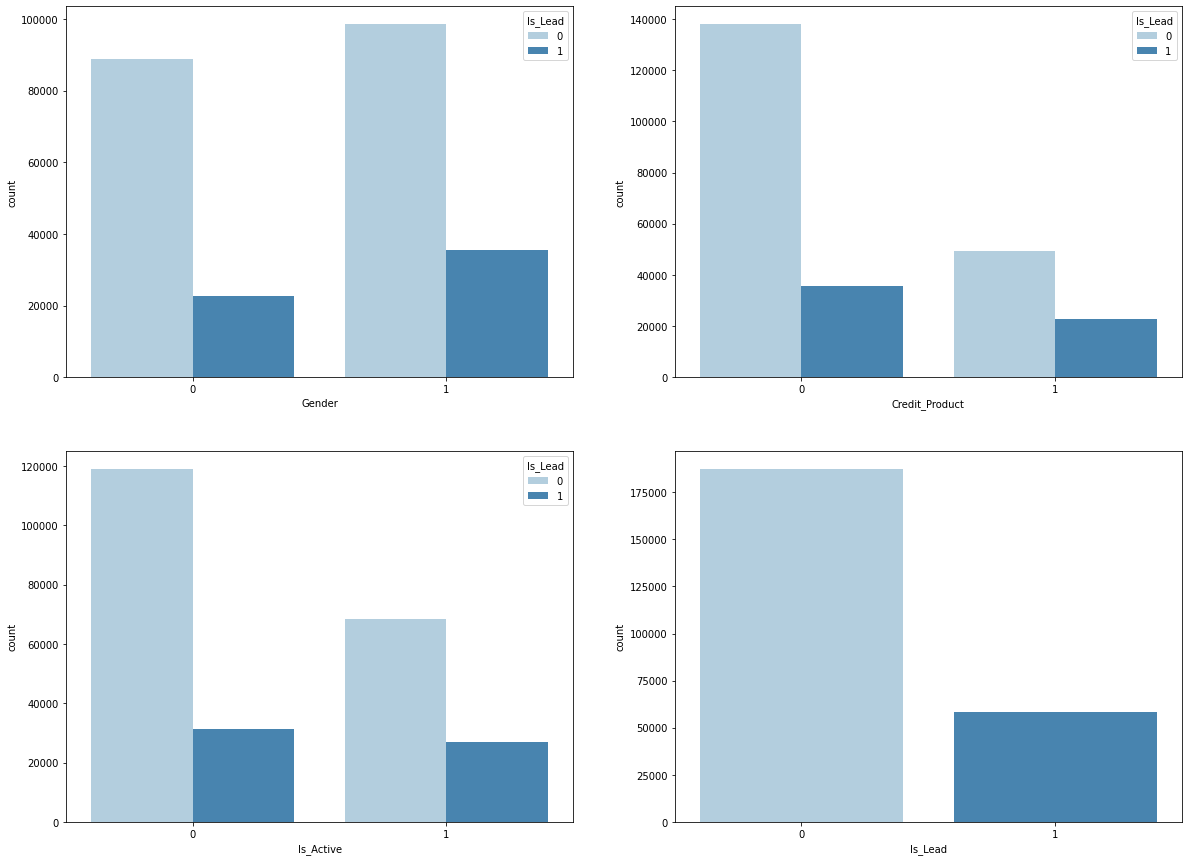

In [25]:
#visualizing the binary features
plt.figure(figsize =(20,15))
plt.subplot(2,2,1)
#sns.countplot(df_train['Gender'])
sns.countplot(x="Gender", hue="Is_Lead", data=df_train, palette="Blues")

plt.subplot(2,2,2)
#sns.countplot(df_train['Credit_Product'])
sns.countplot(x="Credit_Product", hue="Is_Lead", data=df_train, palette="Blues")

plt.subplot(2,2,3)
#sns.countplot(df_train['Is_Active'])
sns.countplot(x="Is_Active", hue="Is_Lead", data=df_train, palette="Blues")

plt.subplot(2,2,4)
sns.countplot(df_train['Is_Lead'],palette="Blues")

In [26]:
df_train['Occupation'].value_counts()

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64

In [27]:
df_train['Channel_Code'].value_counts()

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64

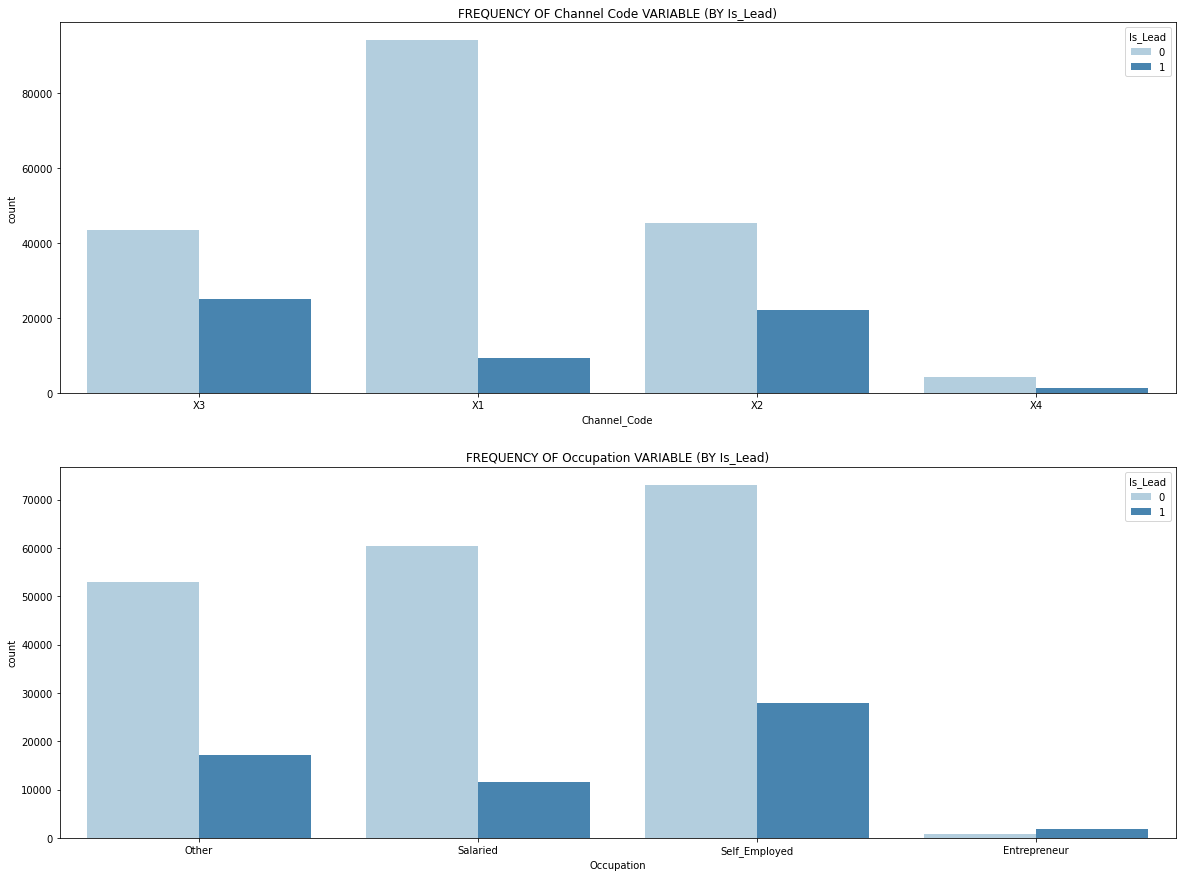

In [28]:
f, axes = plt.subplots(2, 1, figsize=(20, 15), facecolor='white')

#ax1 = sns.countplot(x="Region_Code", hue="Is_Lead", data=df_train, palette="Blues", ax=axes[0,0])
ax1 = sns.countplot(x="Channel_Code", hue="Is_Lead", data=df_train, palette="Blues", ax=axes[0])
ax1.title.set_text('FREQUENCY OF Channel Code VARIABLE (BY Is_Lead)')
ax2 = sns.countplot(x="Occupation", hue="Is_Lead", data=df_train, palette="Blues", ax=axes[1])
ax2.title.set_text('FREQUENCY OF Occupation VARIABLE (BY Is_Lead)')

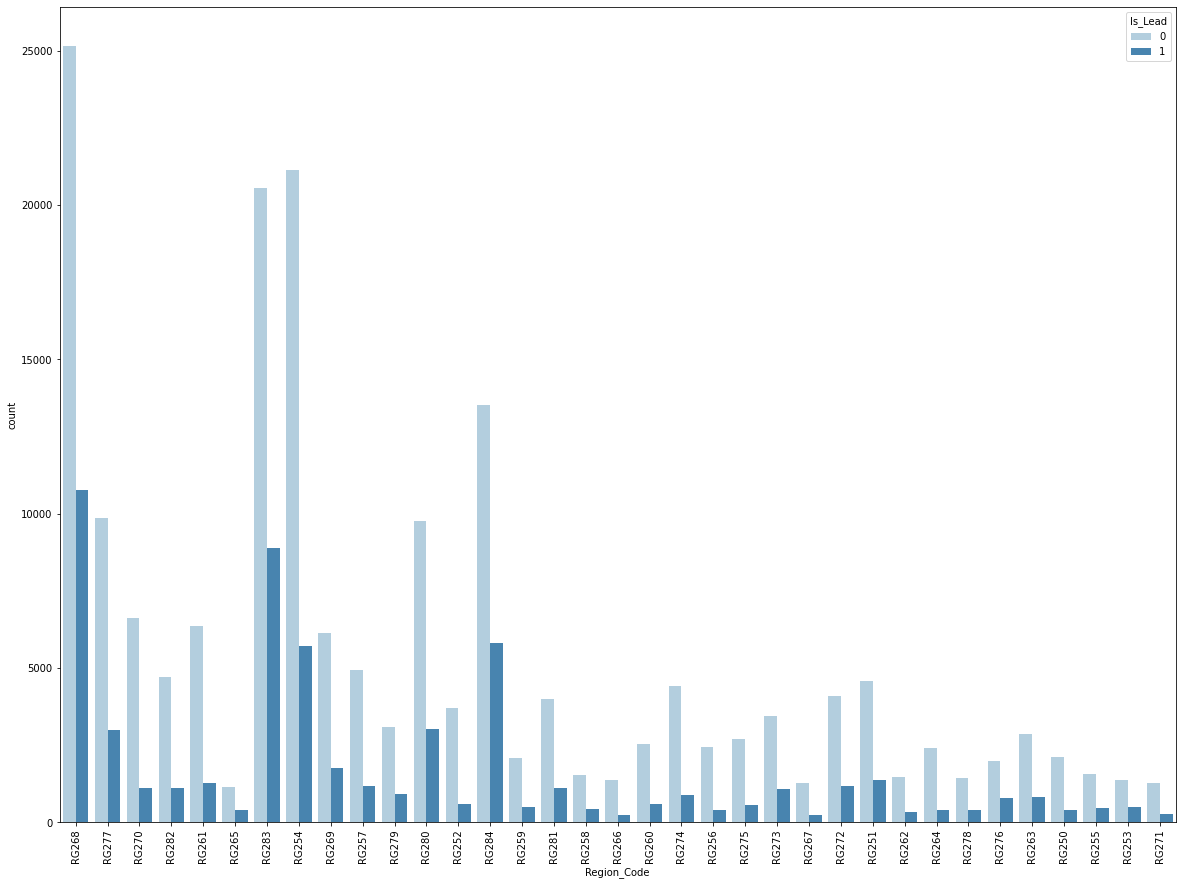

In [29]:
plt.figure(figsize =(20,15))
plt.xticks(rotation=90)
ax1 = sns.countplot(x="Region_Code", hue="Is_Lead", data=df_train, palette="Blues")

In [30]:
yeah = df_train['Is_Lead'].value_counts()
no = yeah[0]
yes = yeah[1]
print(yes,no)

58288 187437


In [31]:
yes_perc = round(yes/len(df_train)*100, 1)
no_perc = round(no/len(df_train)*100, 1)
print(yes_perc,no_perc)

23.7 76.3


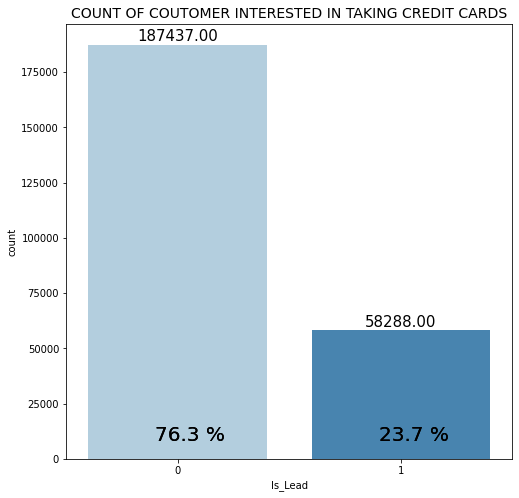

In [32]:
# Defining the plot size
plt.figure(figsize=(8, 8))
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.countplot('Is_Lead',data=df_train, palette="Blues")
  
# Iterrating over the bars one-by-one
for bar in plots.patches:
    
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    plots.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=20)
    plots.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=20)
  

  
# Setting the title for the graph
plt.title('COUNT OF COUTOMER INTERESTED IN TAKING CREDIT CARDS', size=14)
  
# Fianlly showing the plot
plt.show()

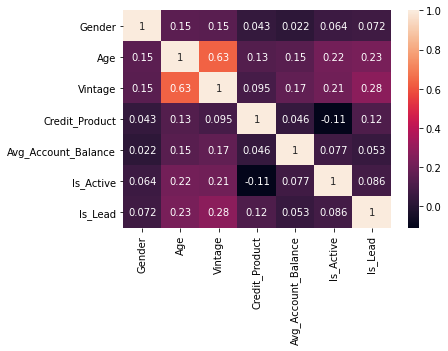

In [33]:
sns.heatmap(df_train.corr(),annot=True)

In [34]:
df_train['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [35]:
df_train.groupby('Credit_Product')['Is_Lead'].sum()

Credit_Product
0    35598
1    22690
Name: Is_Lead, dtype: int64

In [36]:
# # Univariate Analysis on Credit_Score
# yes_perc = np.round((df_train['Credit_Product'].value_counts()[1]/len(df_train))*100,1)
# no_perc = np.round((df_train['Credit_Product'].value_counts()[0]/len(df_train))*100,1)
# yes_perc_Islead = np.round(df_train.groupby('Credit_Product')['Is_Lead'].sum()[1]/(df_train['Is_Lead'].value_counts()[1])*100,1)
# no_perc_Islead = np.round((df_train.groupby('Credit_Product')['Is_Lead'].sum()[0]/(df_train['Is_Lead'].value_counts()[1])*100,1)

                          
                          
# plt.figure(figsize=(8,8))
  
# # Defining the values for x-axis, y-axis
# # and from which datafarme the values are to be picked
# plots = sns.countplot('Credit_Product',hue = 'Is_Lead',data=df_train, palette="Blues")
  
# # Iterrating over the bars one-by-one
# for bar in plots.patches:
    
#     plots.annotate(format(bar.get_height(), '.2f'), 
#                    (bar.get_x() + bar.get_width() / 2, 
#                     bar.get_height()), ha='center', va='center',
#                    size=15, xytext=(0, 8),
#                    textcoords='offset points')
#     plots.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=15)
#     plots.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=15)
#     plots.annotate(str(no_perc_Islead)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=15)
#     plots.annotate(str(yes_perc_Islead)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=15)
  

  
# # Setting the title for the graph
# plt.title('COUNT OF CREDIT PRODUCT', size=14)
  
# # Fianlly showing the plot
# plt.show()

In [37]:
# Univariate Analysis on Credit_Score
yes_perc = np.round((df_train['Credit_Product'].value_counts()[1]/len(df_train))*100,1)
no_perc = np.round((df_train['Credit_Product'].value_counts()[0]/len(df_train))*100,1)
yes_perc_Islead = np.round((df_train.groupby('Credit_Product')['Is_Lead'].sum()[1]/(df_train['Is_Lead'].value_counts()[1]))*100,1)
no_perc_Islead = np.round((df_train.groupby('Credit_Product')['Is_Lead'].sum()[0]/(df_train['Is_Lead'].value_counts()[1]))*100,1)

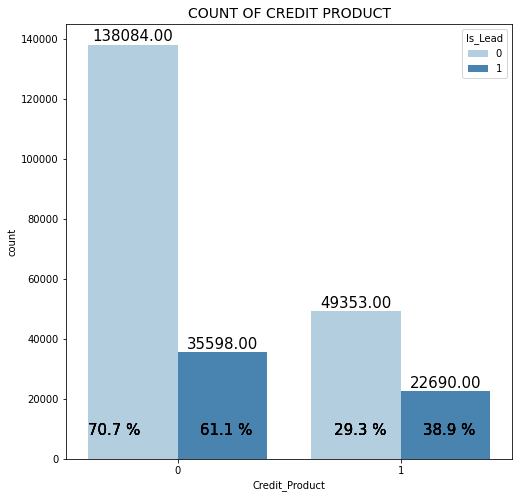

In [38]:
# Univariate Analysis on Credit_Score
yes_perc = np.round((df_train['Credit_Product'].value_counts()[1]/len(df_train))*100,1)
no_perc = np.round((df_train['Credit_Product'].value_counts()[0]/len(df_train))*100,1)
yes_perc_Islead = np.round((df_train.groupby('Credit_Product')['Is_Lead'].sum()[1]/(df_train['Is_Lead'].value_counts()[1]))*100,1)
no_perc_Islead = np.round((df_train.groupby('Credit_Product')['Is_Lead'].sum()[0]/(df_train['Is_Lead'].value_counts()[1]))*100,1)

                          
plt.figure(figsize=(8,8))
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.countplot('Credit_Product',hue = 'Is_Lead',data=df_train, palette="Blues")
  
# Iterrating over the bars one-by-one
for bar in plots.patches:
    
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    plots.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.4, 8000), size=15)
    plots.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.7, 8000), size=15)
    plots.annotate(str(no_perc_Islead)+" %", xy=(-0.3, 15000), xytext=(0.1, 8000), size=15)
    plots.annotate(str(yes_perc_Islead)+" %", xy=(0.7, 15000), xytext=(1.1, 8000), size=15)
  

  
# Setting the title for the graph
plt.title('COUNT OF CREDIT PRODUCT', size=14)
  
# Fianlly showing the plot
plt.show()

In [39]:
df_train['Age'].describe()

count    245725.000000
mean         43.856307
std          14.828672
min          23.000000
25%          30.000000
50%          43.000000
75%          54.000000
max          85.000000
Name: Age, dtype: float64

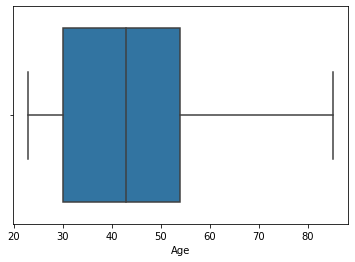

In [40]:
sns.boxplot('Age',hue='Is_Lead',data=df_train)

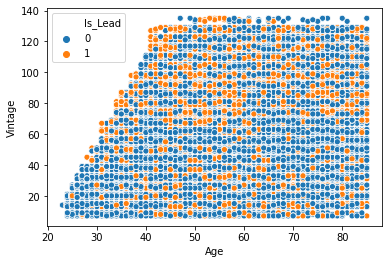

In [41]:
sns.scatterplot(x='Age',y='Vintage',hue='Is_Lead',data=df_train)

In [42]:
df_train_enc = df_train.copy()
df_test_enc = df_test.copy()

In [43]:
from sklearn import base
from sklearn.model_selection import KFold
class KFoldTargetEncoderTrain(base.BaseEstimator,base.TransformerMixin):
    def __init__(self,colnames,targetName,
                  n_fold=5, verbosity=True,
                  discardOriginal_col=False):
        self.colnames = colnames
        self.targetName = targetName
        self.n_fold = n_fold
        self.verbosity = verbosity
        self.discardOriginal_col = discardOriginal_col
    def fit(self, X, y=None):
        return self
    def transform(self,X):
   #     assert(type(self.targetName) == str)
    #    assert(type(self.colnames) == str)
    #    assert(self.colnames in X.columns)
     #   assert(self.targetName in X.columns)
        mean_of_target = X[self.targetName].mean()
        kf = KFold(n_splits = self.n_fold,
                   shuffle = True, random_state=2019)
        print(kf)
        col_mean_name = self.colnames + '_' + 'Kfold_Target_Enc'
        X[col_mean_name] = np.nan
        for tr_ind, val_ind in kf.split(X):
            X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
            #train set and validation set
            X.loc[X.index[val_ind], col_mean_name] = X_val[self.colnames].map(X_tr.groupby(self.colnames)
                                     [self.targetName].mean())
            #test set you take the average of the target values of all samples that have a given category in the entire train set.
            X[col_mean_name].fillna(mean_of_target, inplace = True)
        if self.verbosity:
            encoded_feature = X[col_mean_name].values
            print('Correlation between the new feature, {} and, {} is {}.'.format(col_mean_name,self.targetName,                    
                   np.corrcoef(X[self.targetName].values,
                               encoded_feature)[0][1]))
        if self.discardOriginal_col:
            X = X.drop(self.targetName, axis=1)
        return X
targetc = KFoldTargetEncoderTrain('Region_Code','Is_Lead',n_fold=5)
df_train_enc = targetc.fit_transform(df_train_enc)
print(df_train_enc[['Region_Code_Kfold_Target_Enc','Region_Code']])

KFold(n_splits=5, random_state=2019, shuffle=True)
Correlation between the new feature, Region_Code_Kfold_Target_Enc and, Is_Lead is 0.1250268186377212.
        Region_Code_Kfold_Target_Enc Region_Code
0                           0.299204       RG268
1                           0.230956       RG277
2                           0.298899       RG268
3                           0.144942       RG270
4                           0.195309       RG282
...                              ...         ...
245720                      0.298930       RG284
245721                      0.299204       RG268
245722                      0.217052       RG281
245723                      0.233472       RG273
245724                      0.217755       RG269

[245725 rows x 2 columns]


In [44]:
df_train_enc

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Region_Code_Kfold_Target_Enc
0,NNVBBKZB,0,73,RG268,Other,X3,43,0,1045696,0,0,0.299204
1,IDD62UNG,0,30,RG277,Salaried,X1,32,0,581988,0,0,0.230956
2,HD3DSEMC,0,56,RG268,Self_Employed,X3,26,0,1484315,1,0,0.298899
3,BF3NC7KV,1,34,RG270,Salaried,X1,19,0,470454,0,0,0.144942
4,TEASRWXV,0,30,RG282,Salaried,X1,33,0,886787,0,0,0.195309
...,...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,1,51,RG284,Self_Employed,X3,109,0,1925586,0,0,0.298930
245721,HFNB7JY8,1,27,RG268,Salaried,X1,15,0,862952,1,0,0.299204
245722,GEHAUCWT,0,26,RG281,Salaried,X1,13,0,670659,0,0,0.217052
245723,GE7V8SAH,0,28,RG273,Salaried,X1,31,0,407504,0,0,0.233472


In [45]:
df_train_enc['Region_Code_Kfold_Target_Enc'].describe()

count    245725.000000
mean          0.237199
std           0.053738
min           0.133178
25%           0.211645
50%           0.230956
75%           0.299179
max           0.305935
Name: Region_Code_Kfold_Target_Enc, dtype: float64

In [46]:
class KFoldTargetEncoderTest(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self,train,colNames,encodedName):
        
        self.train = train
        self.colNames = colNames
        self.encodedName = encodedName
        
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        mean =  self.train[[self.colNames,
                self.encodedName]].groupby(
                                self.colNames).mean().reset_index() 
        
        dd = {}
        for index, row in mean.iterrows():
            dd[row[self.colNames]] = row[self.encodedName]
        X[self.encodedName] = X[self.colNames]
        X = X.replace({self.encodedName: dd})
        return X


test_targetc = KFoldTargetEncoderTest(df_train_enc,
                                      'Region_Code',
                                      'Region_Code_Kfold_Target_Enc')
df_test_enc = test_targetc.fit_transform(df_test_enc)

df_test_enc['Region_Code_Kfold_Target_Enc'].describe()

count    105312.000000
mean          0.237192
std           0.053616
min           0.137125
25%           0.212857
50%           0.231956
75%           0.299805
max           0.302010
Name: Region_Code_Kfold_Target_Enc, dtype: float64

In [47]:
df_test_enc

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Region_Code_Kfold_Target_Enc
0,VBENBARO,1,29,RG254,Other,X1,25,1,742366,0,0.212857
1,CCMEWNKY,1,43,RG268,Other,X2,49,0,925537,0,0.299805
2,VK3KGA9M,1,31,RG270,Salaried,X1,14,0,215949,0,0.144345
3,TT8RPZVC,1,29,RG272,Other,X1,33,0,868070,0,0.219941
4,SHQZEYTZ,0,29,RG270,Other,X1,19,0,657087,0,0.144345
...,...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,1,52,RG268,Salaried,X2,86,1,4242558,1,0.299805
105308,CWQ72DWS,1,55,RG277,Other,X2,86,1,1159153,0,0.231956
105309,HDESC8GU,1,35,RG254,Salaried,X4,15,0,1703727,0,0.212857
105310,2PW4SFCA,1,53,RG254,Other,X3,93,0,737178,1,0.212857


In [48]:
Channelcode_enc = pd.get_dummies(df_train_enc['Channel_Code'], prefix='Channel_Code',drop_first=True)
df_train_final = pd.concat([df_train_enc,Channelcode_enc],axis=1)

Channelcode_enc_test = pd.get_dummies(df_test_enc['Channel_Code'], prefix='Channel_Code',drop_first=True)
df_test_final = pd.concat([df_test_enc,Channelcode_enc_test],axis=1)

In [49]:
df_train_final

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Region_Code_Kfold_Target_Enc,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,NNVBBKZB,0,73,RG268,Other,X3,43,0,1045696,0,0,0.299204,0,1,0
1,IDD62UNG,0,30,RG277,Salaried,X1,32,0,581988,0,0,0.230956,0,0,0
2,HD3DSEMC,0,56,RG268,Self_Employed,X3,26,0,1484315,1,0,0.298899,0,1,0
3,BF3NC7KV,1,34,RG270,Salaried,X1,19,0,470454,0,0,0.144942,0,0,0
4,TEASRWXV,0,30,RG282,Salaried,X1,33,0,886787,0,0,0.195309,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,1,51,RG284,Self_Employed,X3,109,0,1925586,0,0,0.298930,0,1,0
245721,HFNB7JY8,1,27,RG268,Salaried,X1,15,0,862952,1,0,0.299204,0,0,0
245722,GEHAUCWT,0,26,RG281,Salaried,X1,13,0,670659,0,0,0.217052,0,0,0
245723,GE7V8SAH,0,28,RG273,Salaried,X1,31,0,407504,0,0,0.233472,0,0,0


In [50]:
Occupation_enc = pd.get_dummies(df_train_final['Occupation'],prefix='Occupation',drop_first=True)
df_train_final = pd.concat([df_train_final,Occupation_enc],axis=1)

Occupation_enc_test = pd.get_dummies(df_test_final['Occupation'],prefix='Occupation',drop_first=True)
df_test_final = pd.concat([df_test_final,Occupation_enc_test],axis=1)

In [51]:
df_train_final.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead', 'Region_Code_Kfold_Target_Enc', 'Channel_Code_X2',
       'Channel_Code_X3', 'Channel_Code_X4', 'Occupation_Other',
       'Occupation_Salaried', 'Occupation_Self_Employed'],
      dtype='object')

In [52]:
df_test_final.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Region_Code_Kfold_Target_Enc', 'Channel_Code_X2', 'Channel_Code_X3',
       'Channel_Code_X4', 'Occupation_Other', 'Occupation_Salaried',
       'Occupation_Self_Employed'],
      dtype='object')

In [53]:
df_train_final = df_train_final.drop(['ID','Channel_Code','Occupation','Region_Code'],axis=1)

df_test_final = df_test_final.drop(['ID','Channel_Code','Occupation','Region_Code'],axis=1)

In [54]:
df_train_final.head(10)

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Region_Code_Kfold_Target_Enc,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed
0,0,73,43,0,1045696,0,0,0.299204,0,1,0,1,0,0
1,0,30,32,0,581988,0,0,0.230956,0,0,0,0,1,0
2,0,56,26,0,1484315,1,0,0.298899,0,1,0,0,0,1
3,1,34,19,0,470454,0,0,0.144942,0,0,0,0,1,0
4,0,30,33,0,886787,0,0,0.195309,0,0,0,0,1,0
5,1,56,32,0,544163,1,0,0.166529,0,0,0,0,0,1
6,1,62,20,0,1056750,1,1,0.187323,0,1,0,1,0,0
7,0,48,13,0,444724,1,0,0.249183,0,1,0,0,0,1
8,0,40,38,0,1274284,0,0,0.301809,1,0,0,0,0,1
9,0,55,49,1,2014239,0,0,0.299204,1,0,0,0,0,1


In [55]:
df_test_final.head(10)

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Region_Code_Kfold_Target_Enc,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed
0,1,29,25,1,742366,0,0.212857,0,0,0,1,0,0
1,1,43,49,0,925537,0,0.299805,1,0,0,1,0,0
2,1,31,14,0,215949,0,0.144345,0,0,0,0,1,0
3,1,29,33,0,868070,0,0.219941,0,0,0,1,0,0
4,0,29,19,0,657087,0,0.144345,0,0,0,1,0,0
5,1,60,110,0,4624262,0,0.299805,0,1,0,0,0,1
6,0,69,67,0,1032764,0,0.258950,1,0,0,1,0,0
7,0,30,33,0,837009,0,0.191804,0,0,0,0,1,0
8,1,43,81,0,1001232,1,0.301027,0,1,0,0,1,0
9,0,54,37,1,1667851,0,0.302010,1,0,0,0,0,1


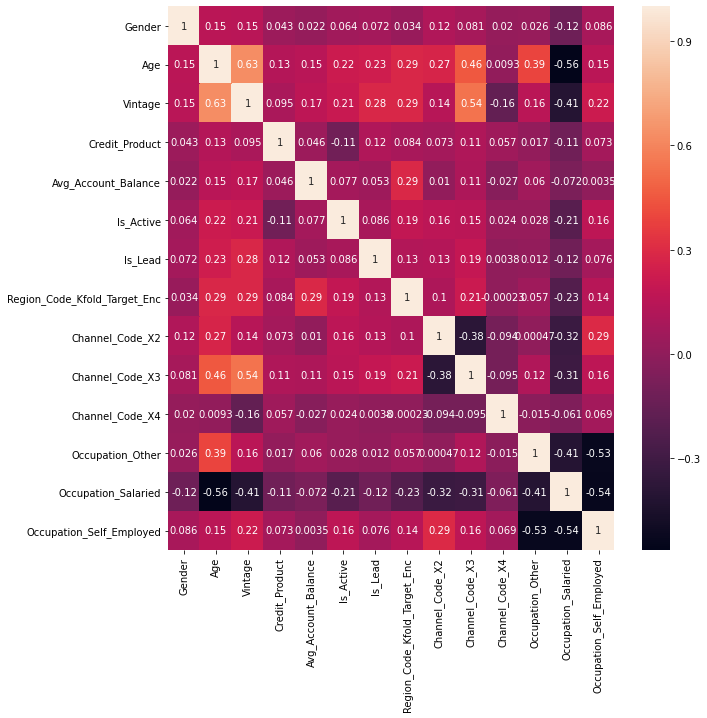

In [56]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_train_final.corr(), annot=True)

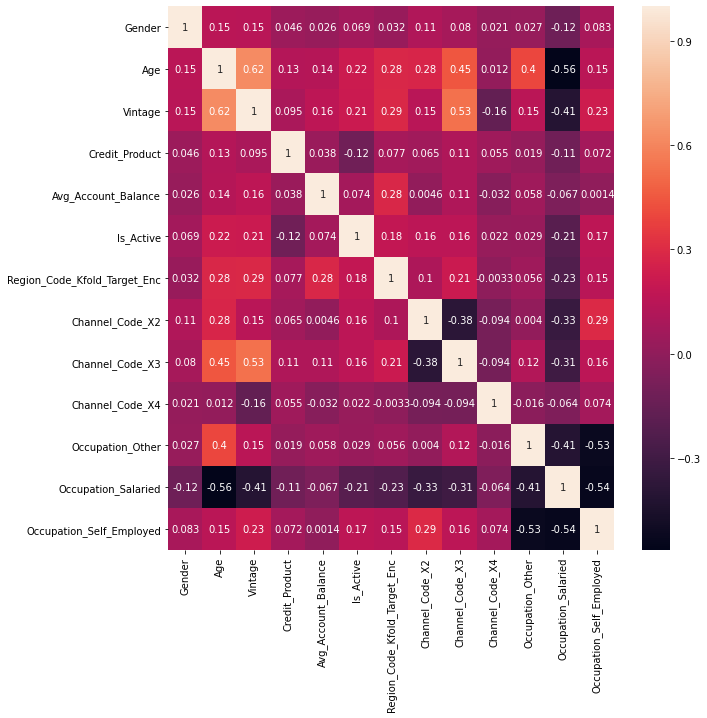

In [57]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_test_final.corr(), annot=True)

In [58]:
df_train_final.columns

Index(['Gender', 'Age', 'Vintage', 'Credit_Product', 'Avg_Account_Balance',
       'Is_Active', 'Is_Lead', 'Region_Code_Kfold_Target_Enc',
       'Channel_Code_X2', 'Channel_Code_X3', 'Channel_Code_X4',
       'Occupation_Other', 'Occupation_Salaried', 'Occupation_Self_Employed'],
      dtype='object')

In [59]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_train_df = scaler.fit_transform(df_train_final)
scaled_train_df = pd.DataFrame(scaled_train_df, columns=['Gender', 'Age', 'Vintage', 'Credit_Product', 'Avg_Account_Balance',
       'Is_Active', 'Is_Lead', 'Region_Code_Kfold_Target_Enc',
       'Channel_Code_X2', 'Channel_Code_X3', 'Channel_Code_X4',
       'Occupation_Other', 'Occupation_Salaried', 'Occupation_Self_Employed'])

In [60]:
scaled_train_df

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Region_Code_Kfold_Target_Enc,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed
0,0.0,0.806452,0.281250,0.0,0.099205,0.0,0.0,0.961038,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.112903,0.195312,0.0,0.054321,0.0,0.0,0.565986,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.532258,0.148438,0.0,0.141660,1.0,0.0,0.959269,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.177419,0.093750,0.0,0.043525,0.0,0.0,0.068096,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.112903,0.203125,0.0,0.083823,0.0,0.0,0.359646,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,1.0,0.451613,0.796875,0.0,0.184373,0.0,0.0,0.959449,0.0,1.0,0.0,0.0,0.0,1.0
245721,1.0,0.064516,0.062500,0.0,0.081516,1.0,0.0,0.961038,0.0,0.0,0.0,0.0,1.0,0.0
245722,0.0,0.048387,0.046875,0.0,0.062903,0.0,0.0,0.485506,0.0,0.0,0.0,0.0,1.0,0.0
245723,0.0,0.080645,0.187500,0.0,0.037432,0.0,0.0,0.580548,0.0,0.0,0.0,0.0,1.0,0.0


In [61]:
scaled_test_df = scaler.fit_transform(df_test_final)
scaled_test_df = pd.DataFrame(scaled_test_df, columns=['Gender', 'Age', 'Vintage', 'Credit_Product', 'Avg_Account_Balance',
       'Is_Active', 'Region_Code_Kfold_Target_Enc',
       'Channel_Code_X2', 'Channel_Code_X3', 'Channel_Code_X4',
       'Occupation_Other', 'Occupation_Salaried', 'Occupation_Self_Employed'])

In [62]:
scaled_test_df

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Region_Code_Kfold_Target_Enc,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed
0,1.0,0.081967,0.140625,1.0,0.072805,0.0,0.459300,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.311475,0.328125,0.0,0.091333,0.0,0.986628,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.114754,0.054688,0.0,0.019558,0.0,0.043786,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.081967,0.203125,0.0,0.085520,0.0,0.502264,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.081967,0.093750,0.0,0.064179,0.0,0.043786,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105307,1.0,0.459016,0.617188,1.0,0.426851,1.0,0.986628,1.0,0.0,0.0,0.0,1.0,0.0
105308,1.0,0.508197,0.617188,1.0,0.114963,0.0,0.575133,1.0,0.0,0.0,1.0,0.0,0.0
105309,1.0,0.180328,0.062500,0.0,0.170047,0.0,0.459300,0.0,0.0,1.0,0.0,1.0,0.0
105310,1.0,0.475410,0.671875,0.0,0.072280,1.0,0.459300,0.0,1.0,0.0,1.0,0.0,0.0


In [63]:
scaled_test_df.describe()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Region_Code_Kfold_Target_Enc,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed
count,105312.000000,105312.000000,105312.000000,105312.000000,105312.000000,105312.000000,105312.000000,105312.000000,105312.000000,105312.000000,105312.000000,105312.000000,105312.000000
mean,0.547943,0.325754,0.311272,0.296092,0.112439,0.394210,0.606891,0.277043,0.277927,0.022628,0.286112,0.293537,0.410134
std,0.497698,0.243818,0.252138,0.456534,0.087621,0.488683,0.325169,0.447540,0.447979,0.148715,0.451944,0.455385,0.491860
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.098361,0.101562,0.000000,0.058807,0.000000,0.459300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.311475,0.195312,0.000000,0.088409,0.000000,0.575133,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.491803,0.515625,1.000000,0.136452,1.000000,0.986628,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
scaled_test_df.shape

(105312, 13)

In [65]:
y_train = scaled_train_df.pop('Is_Lead')
X_train = scaled_train_df

In [66]:
y_train.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Is_Lead, dtype: float64

In [67]:
X_train.head()

print(X_train.shape)
print(y_train.shape)
# y_train = y_train.values.reshape(-1,1)

(245725, 13)
(245725,)


# Model Building : Decision Tree

### Create Helper Function to evaluate th emodel performance and and Create the GRaph for Decison Tree

In [68]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    
    export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True, feature_names=scaled_train_df.columns, 
                   class_names=['Is_Lead_No', 'Is_Lead_Yes'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    
    return graph

In [69]:
def evaluate_model(dt_classifier):
    y_train_pred = dt_classifier.predict(X_train)
    y_test_pred = dt_classifier.predict(scaled_test_df)
    print('Train set Performance')
    print(f'Accuracy is {accuracy_score(y_train, y_train_pred)}')
    print(f'Confusion Matrix : \n {confusion_matrix(y_train,y_train_pred)}')
    print(f'ROC_AUC_Score: {roc_auc_score(y_train, y_train_pred)}')
    
#     print("-"*50)
#     print('Test set Performance')
#     print(accuracy_score(scaled_test_df, y_test_pred))
#     print(confusion_matrix(scaled_test_df,y_test_pred))
    

In [70]:
dt =DecisionTreeClassifier(max_depth=3)

dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [71]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(scaled_test_df)

In [72]:
y_train_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [73]:
y_test_pred

array([0., 0., 0., ..., 0., 0., 0.])

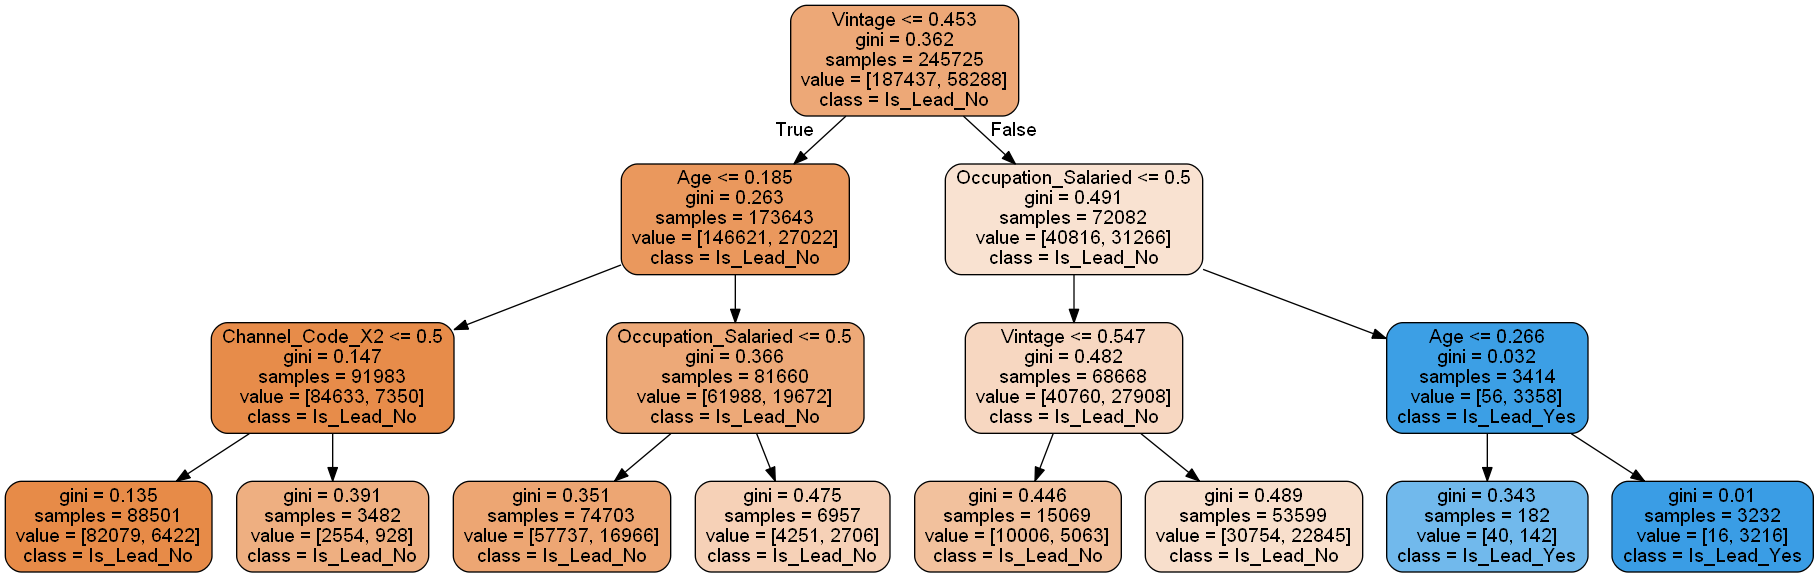

In [74]:
dot_data  = StringIO()

export_graphviz(dt, out_file = dot_data, filled = True, rounded = True, feature_names = scaled_train_df.columns, 
                class_names = ['Is_Lead_No', 'Is_Lead_Yes'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Evaluation of model performance:-

In [75]:
evaluate_model(dt)

Train set Performance
Accuracy is 0.7762295248753688
Confusion Matrix : 
 [[187381     56]
 [ 54930   3358]]
ROC_AUC_Score: 0.5286558594054517


### Decision Tree without any hyperparameter tuning

In [76]:
# dt_default = DecisionTreeClassifier(random_state=42)
# dt_default.fit(X_train,y_train)

In [77]:
# gph = get_dt_graph(dt_default)
# Image(gph.create_png())

In [78]:
# # Evaluate the default model performance
# evaluate_model(dt_default)

### Hyper-parameter tuning using GRID SEARCH CV

In [79]:
dt = DecisionTreeClassifier(random_state=42)

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
params = {
    'max_depth':[2,3,5,10,20,25,30,35,40,45,50], 'min_samples_leaf':[5,10,20,30,40,50,100], 'criterion':['gini','entropy']
}

In [82]:
grid_search = GridSearchCV(estimator= dt, param_grid = params, cv = 4, n_jobs=-1, verbose=1, scoring="accuracy")

In [83]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 154 candidates, totalling 616 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 616 out of 616 | elapsed:  3.0min finished


Wall time: 3min 3s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20, 25, 30, 35, 40, 45, 50],
                         'min_samples_leaf': [5, 10, 20, 30, 40, 50, 100]},
             scoring='accuracy', verbose=1)

In [84]:
result_cv = pd.DataFrame(grid_search.cv_results_)
result_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.510946,0.014703,0.032248,0.004724,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.776143,0.776888,0.776041,0.775846,0.776230,0.000395,85
1,0.624406,0.227665,0.039808,0.012313,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.776143,0.776888,0.776041,0.775846,0.776230,0.000395,85
2,0.489464,0.023354,0.029981,0.005771,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.776143,0.776888,0.776041,0.775846,0.776230,0.000395,85
3,0.497482,0.051018,0.034167,0.009144,gini,2,30,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.776143,0.776888,0.776041,0.775846,0.776230,0.000395,85
4,0.581063,0.106202,0.058927,0.030010,gini,2,40,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.776143,0.776888,0.776041,0.775846,0.776230,0.000395,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,3.133620,0.169660,0.048371,0.001115,entropy,50,20,"{'criterion': 'entropy', 'max_depth': 50, 'min...",0.774613,0.772867,0.776009,0.774348,0.774459,0.001115,115
150,3.119409,0.162645,0.048870,0.002992,entropy,50,30,"{'criterion': 'entropy', 'max_depth': 50, 'min...",0.779659,0.779899,0.779916,0.779834,0.779827,0.000102,75
151,2.940638,0.131219,0.048869,0.004729,entropy,50,40,"{'criterion': 'entropy', 'max_depth': 50, 'min...",0.782361,0.783741,0.781430,0.781283,0.782204,0.000979,65
152,2.879549,0.146032,0.041141,0.003260,entropy,50,50,"{'criterion': 'entropy', 'max_depth': 50, 'min...",0.784917,0.785222,0.783106,0.783497,0.784186,0.000901,32


In [85]:
# 5 best result in terms of mean_test_score
result_cv.nlargest(5,'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
103,2.128807,0.112048,0.041639,0.005615,entropy,10,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.792421,0.789129,0.789194,0.791376,0.790530,0.001417,1
27,1.868005,0.136013,0.038147,0.002271,gini,10,100,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.791460,0.790464,0.787892,0.791457,0.790318,0.001459,2
104,2.055504,0.088788,0.036153,0.000826,entropy,10,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.792030,0.788608,0.789390,0.791197,0.790306,0.001368,3
102,1.974967,0.015473,0.034159,0.000827,entropy,10,40,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.792014,0.789048,0.788543,0.790969,0.790143,0.001409,4
101,2.200864,0.180414,0.037152,0.000826,entropy,10,30,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.791640,0.788983,0.788511,0.791245,0.790095,0.001365,5


In [86]:
#best score from grid search results
grid_search.best_score_

0.7905300564011325

In [87]:
#best estimators from grid search results
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       random_state=42)

In [88]:
dt_best = grid_search.best_estimator_

In [89]:
evaluate_model(dt_best)

Train set Performance
Accuracy is 0.793789805677078
Confusion Matrix : 
 [[176504  10933]
 [ 39738  18550]]
ROC_AUC_Score: 0.6299591958899654


In [91]:
dt_best.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       random_state=42)

In [92]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(scaled_test_df)

In [93]:
df_best = pd.DataFrame()
df_best['ID'] = df_test_enc['ID']
df_best['Is_Lead'] = y_test_pred

In [94]:
df_best

,ID,Is_Lead
0,VBENBARO,0.0
1,CCMEWNKY,0.0
2,VK3KGA9M,0.0
3,TT8RPZVC,0.0
4,SHQZEYTZ,0.0
...,...,...
105307,DBENJOYI,1.0
105308,CWQ72DWS,1.0
105309,HDESC8GU,0.0
105310,2PW4SFCA,1.0


In [95]:
df_best.to_csv(r'C:\Users\avina\OneDrive\Desktop\Data\Job-a-thon dataset\DT_sub.csv')

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\avina\\OneDrive\\Desktop\\Data\\Job-a-thon dataset\\DT_sub.csv'

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

In [97]:
GBM = GradientBoostingClassifier()

GBM.fit(X_train,y_train)

GradientBoostingClassifier()

In [98]:
y_train_pred_GBM = GBM.predict(X_train)
y_test_pred_GBM = GBM.predict(scaled_test_df)
print('Train set Performance')
print(f'Accuracy is {accuracy_score(y_train, y_train_pred_GBM)}')
print(f'Confusion Matrix : \n {confusion_matrix(y_train,y_train_pred_GBM)}')
print(f'ROC_AUC_Score: {roc_auc_score(y_train, y_train_pred_GBM)}')

Train set Performance
Accuracy is 0.7906765693356395
Confusion Matrix : 
 [[182103   5334]
 [ 46102  12186]]
ROC_AUC_Score: 0.5903038845152988


In [99]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

RF.fit(X_train,y_train)

RF.score(X_train,y_train)


0.9999511649201343

In [100]:
y_train_pred_RF = RF.predict(X_train)
y_test_pred_RF = RF.predict(scaled_test_df)
print('Train set Performance')
print(f'Accuracy is {accuracy_score(y_train, y_train_pred_RF)}')
print(f'Confusion Matrix : \n {confusion_matrix(y_train,y_train_pred_RF)}')
print(f'ROC_AUC_Score: {roc_auc_score(y_train, y_train_pred_RF)}')

Train set Performance
Accuracy is 0.9999511649201343
Confusion Matrix : 
 [[187437      0]
 [    12  58276]]
ROC_AUC_Score: 0.9998970628602799


In [101]:
# df_RF = pd.DataFrame()
# df_RF['ID'] = df_test_enc['ID']
# df_RF['Is_Lead'] = y_test_pred

# df_RF

In [102]:
# df_RF.to_csv(r'C:\Users\avina\OneDrive\Desktop\Data\Job-a-thon dataset\RF_sub.csv')

In [105]:
from xgboost import XGBClassifier 
xgb = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)
y_train_pred_XGB = RF.predict(X_train)
y_test_pred_XGB = RF.predict(scaled_test_df)
print('Train set Performance')
print(f'Accuracy is {accuracy_score(y_train, y_train_pred_XGB)}')
print(f'Confusion Matrix : \n {confusion_matrix(y_train,y_train_pred_XGB)}')
print(f'ROC_AUC_Score: {roc_auc_score(y_train, y_train_pred_XGB)}')

[16:06:37] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train set Performance
Accuracy is 0.9999511649201343
Confusion Matrix : 
 [[187437      0]
 [    12  58276]]
ROC_AUC_Score: 0.9998970628602799


In [106]:
df_XGB = pd.DataFrame()
df_XGB['ID'] = df_test_enc['ID']
df_XGB['Is_Lead'] = y_test_pred

df_XGB

,ID,Is_Lead
0,VBENBARO,0.0
1,CCMEWNKY,0.0
2,VK3KGA9M,0.0
3,TT8RPZVC,0.0
4,SHQZEYTZ,0.0
...,...,...
105307,DBENJOYI,1.0
105308,CWQ72DWS,1.0
105309,HDESC8GU,0.0
105310,2PW4SFCA,1.0


In [107]:
df_XGB.to_csv(r'C:\Users\avina\OneDrive\Desktop\Data\Job-a-thon dataset\XGB_sub.csv')